In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_nonCenter_p1e-06_20190621_500PCs.pearsonr.tsv
all_beta_center_p1e-06_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p001_20190621_500PCs.pearsonr.tsv
all_beta_center_p1e-05_20190621_500PCs.pearsonr.tsv
all_beta_center_p00001_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p0001_20190621_500PCs.pearsonr.tsv
all_beta_center_p001_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p00001_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p1e-05_20190621_500PCs.pearsonr.tsv
all_beta_center_p0001_20190621_500PCs.pearsonr.tsv


In [3]:
datas = {os.path.basename(f)[4:-29]:pd.read_table(f, index_col=0, names=['PHENO','WBR','NBW']) for f in files}
print(datas.items()[0][0])
print(datas.items()[0][1].head())

beta_nonCenter_p0001
                  WBR       NBW
PHENO                          
BIN10030500  0.012784  0.005152
BIN10030510  0.031439  0.017535
BIN10030800 -0.000441  0.009125
BIN10030820  0.020673  0.015623
BIN1020483   0.040047  0.000516


In [4]:
wbr=pd.DataFrame([datas[ds]['WBR'] for ds in datas], 
                 index=[ds for ds in datas]).T
wbr.head()

,beta_nonCenter_p0001,beta_center_p0001,beta_nonCenter_p00001,beta_center_p001,beta_nonCenter_p001,beta_nonCenter_p1e-06,beta_center_p1e-05,beta_center_p1e-06,beta_nonCenter_p1e-05,beta_center_p00001
BIN10030500,0.012784,0.084445,0.026408,0.213698,0.023964,0.041637,0.008902,0.005661,0.030148,0.025035
BIN10030510,0.031439,0.112129,0.027168,0.241447,0.035584,0.036223,0.009715,0.008278,0.034015,0.025345
BIN10030800,-0.000441,0.027208,-0.003020,0.044286,-0.001308,0.004938,0.030440,0.030197,-0.001397,0.030717
BIN10030820,0.020673,0.049742,0.021290,0.055293,0.026095,0.024812,0.048048,0.047799,0.023553,0.049237
BIN1020483,0.040047,0.022049,0.027166,0.175482,0.066671,0.013865,0.000759,-0.001253,0.022123,0.007439


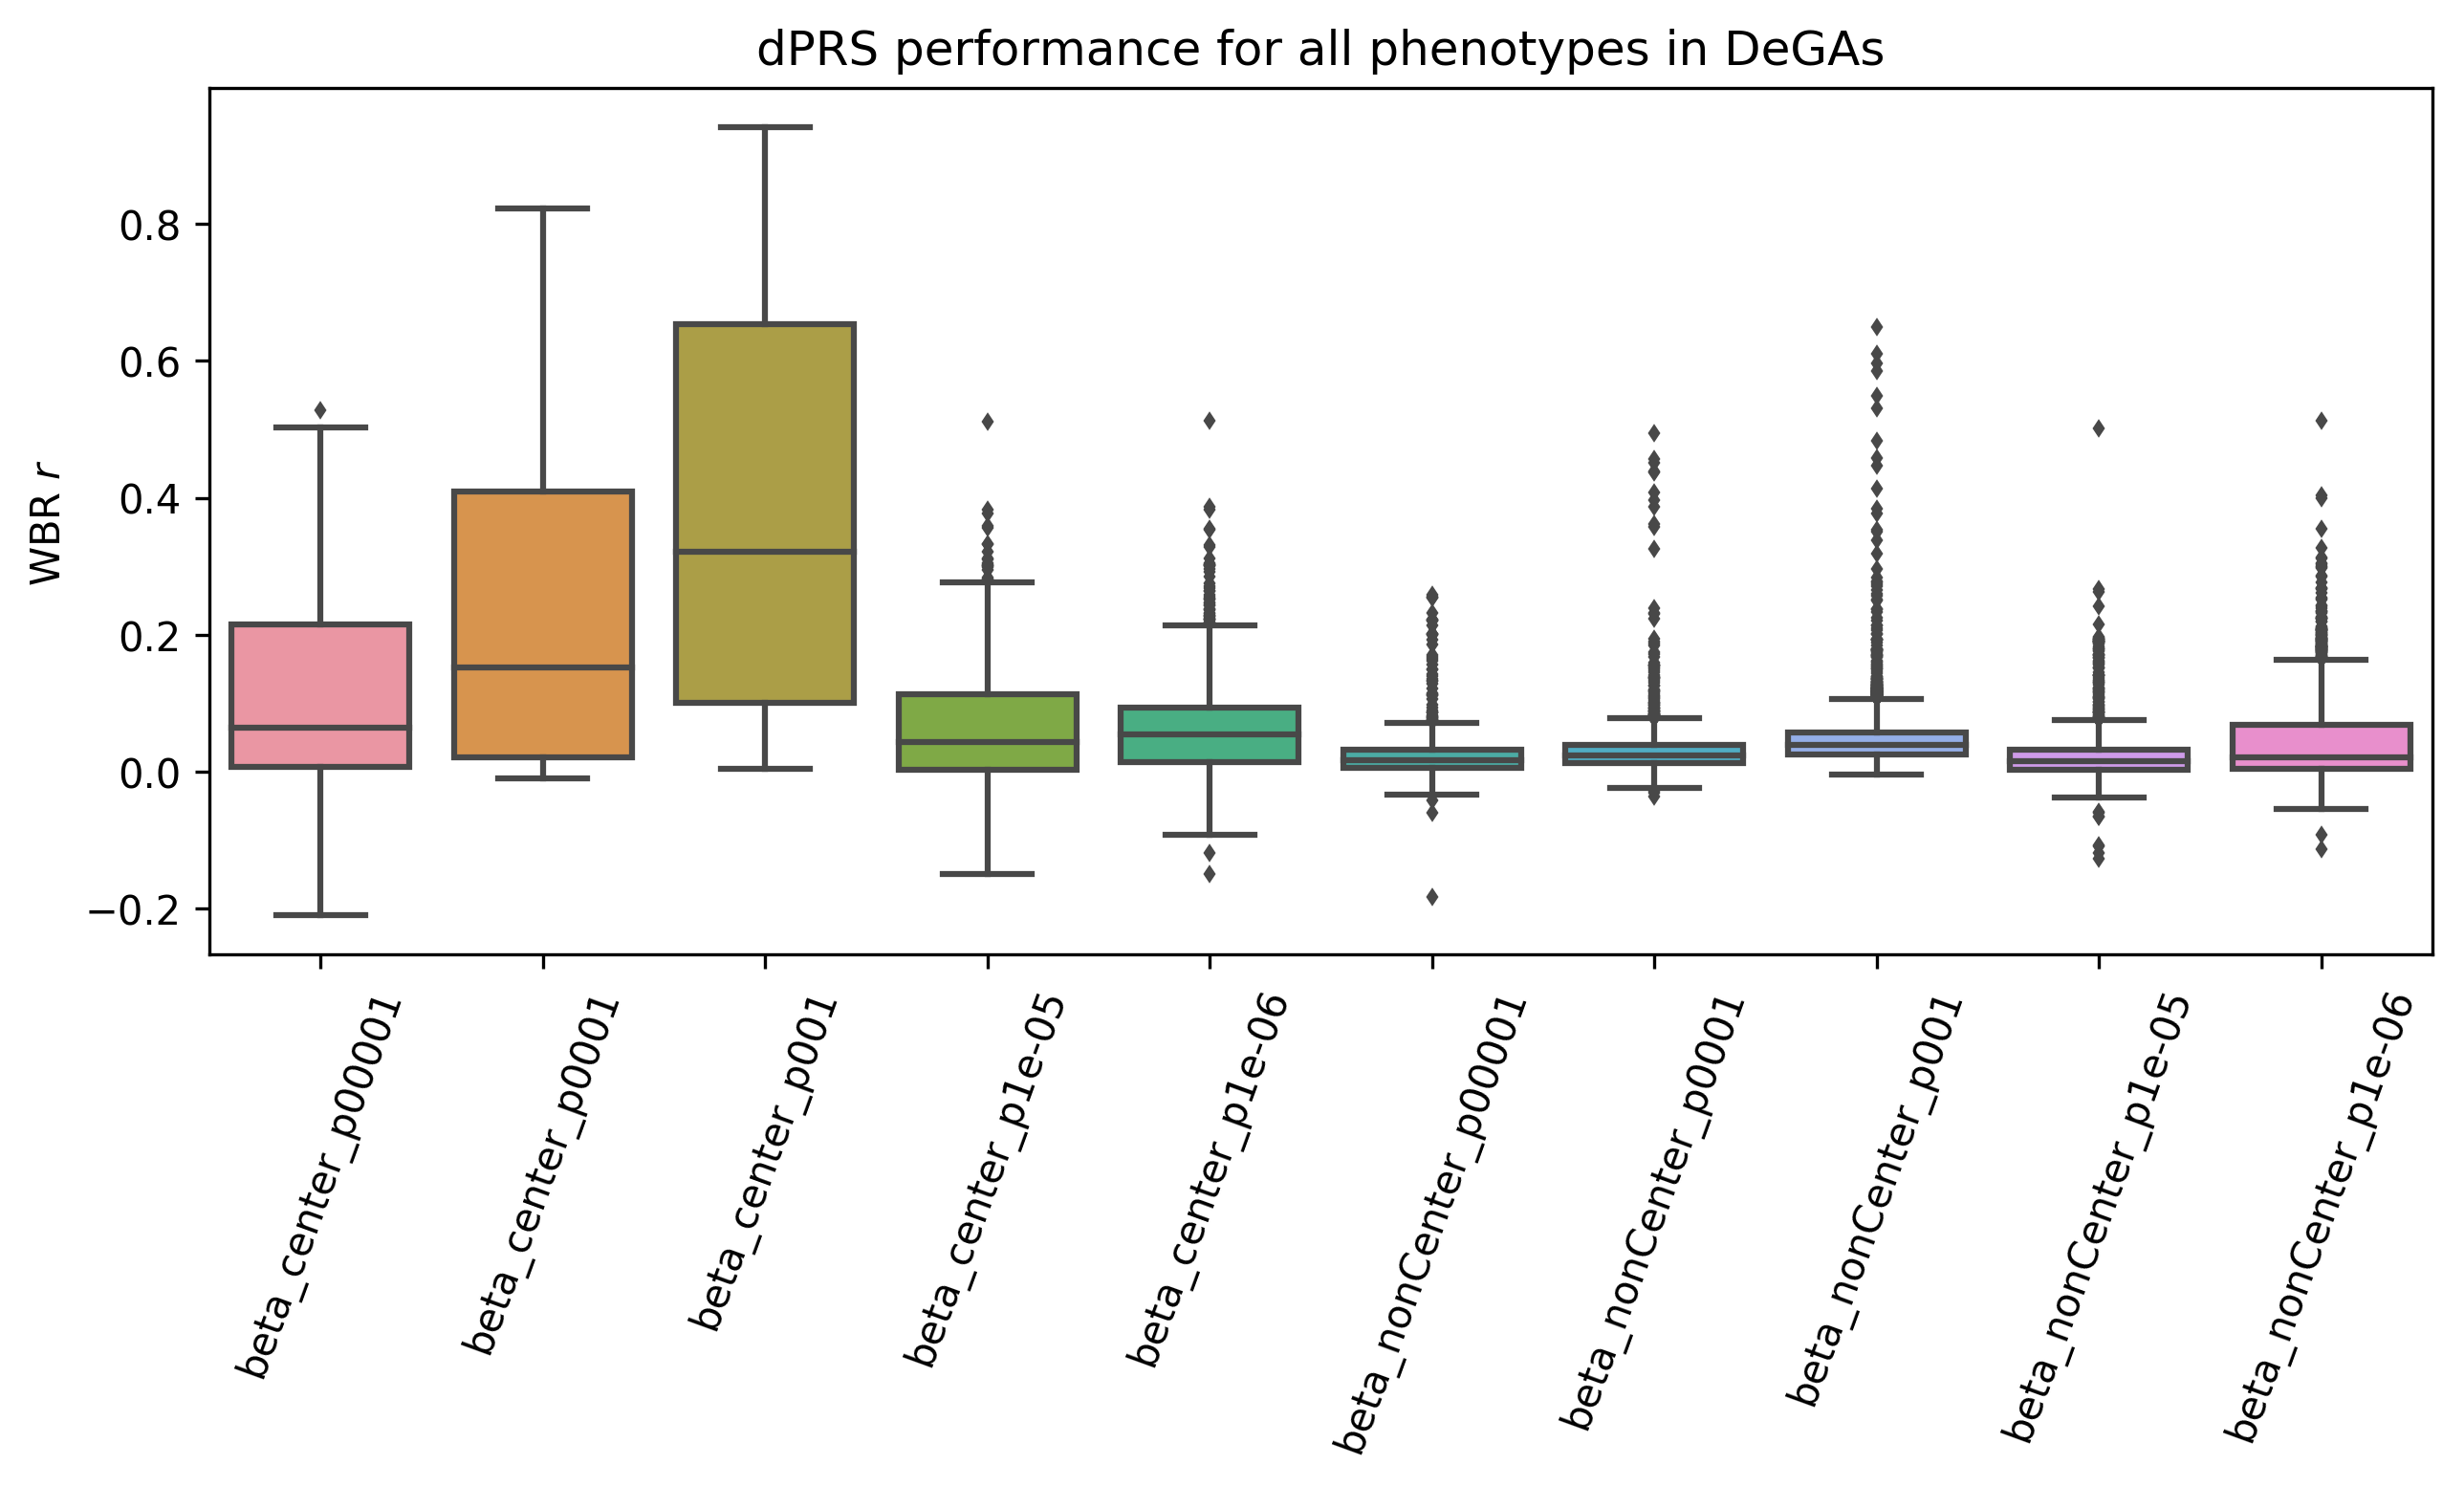

In [5]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=wbr.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(rotation=70), plt.xlabel('')
plt.ylabel('WBR '+'$r$')
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [6]:
nbw=pd.DataFrame([datas[ds]['NBW'] for ds in datas], 
                 index=[ds for ds in datas]).T
nbw.head()

,beta_nonCenter_p0001,beta_center_p0001,beta_nonCenter_p00001,beta_center_p001,beta_nonCenter_p001,beta_nonCenter_p1e-06,beta_center_p1e-05,beta_center_p1e-06,beta_nonCenter_p1e-05,beta_center_p00001
BIN10030500,0.005152,0.016773,0.002120,0.031252,0.006173,0.014843,-0.000184,0.000494,0.002167,0.008153
BIN10030510,0.017535,0.031720,0.004780,0.040843,0.006427,0.017565,0.003032,0.006578,0.010583,0.011473
BIN10030800,0.009125,0.016195,0.010679,0.020210,0.002338,0.006665,0.030036,0.031698,0.004287,0.030251
BIN10030820,0.015623,0.051848,0.019245,0.049701,0.011258,0.024319,0.052827,0.052654,0.022137,0.053138
BIN1020483,0.000516,0.003534,0.005061,0.003758,-0.008104,-0.000506,0.006027,-0.008986,0.012546,-0.004772


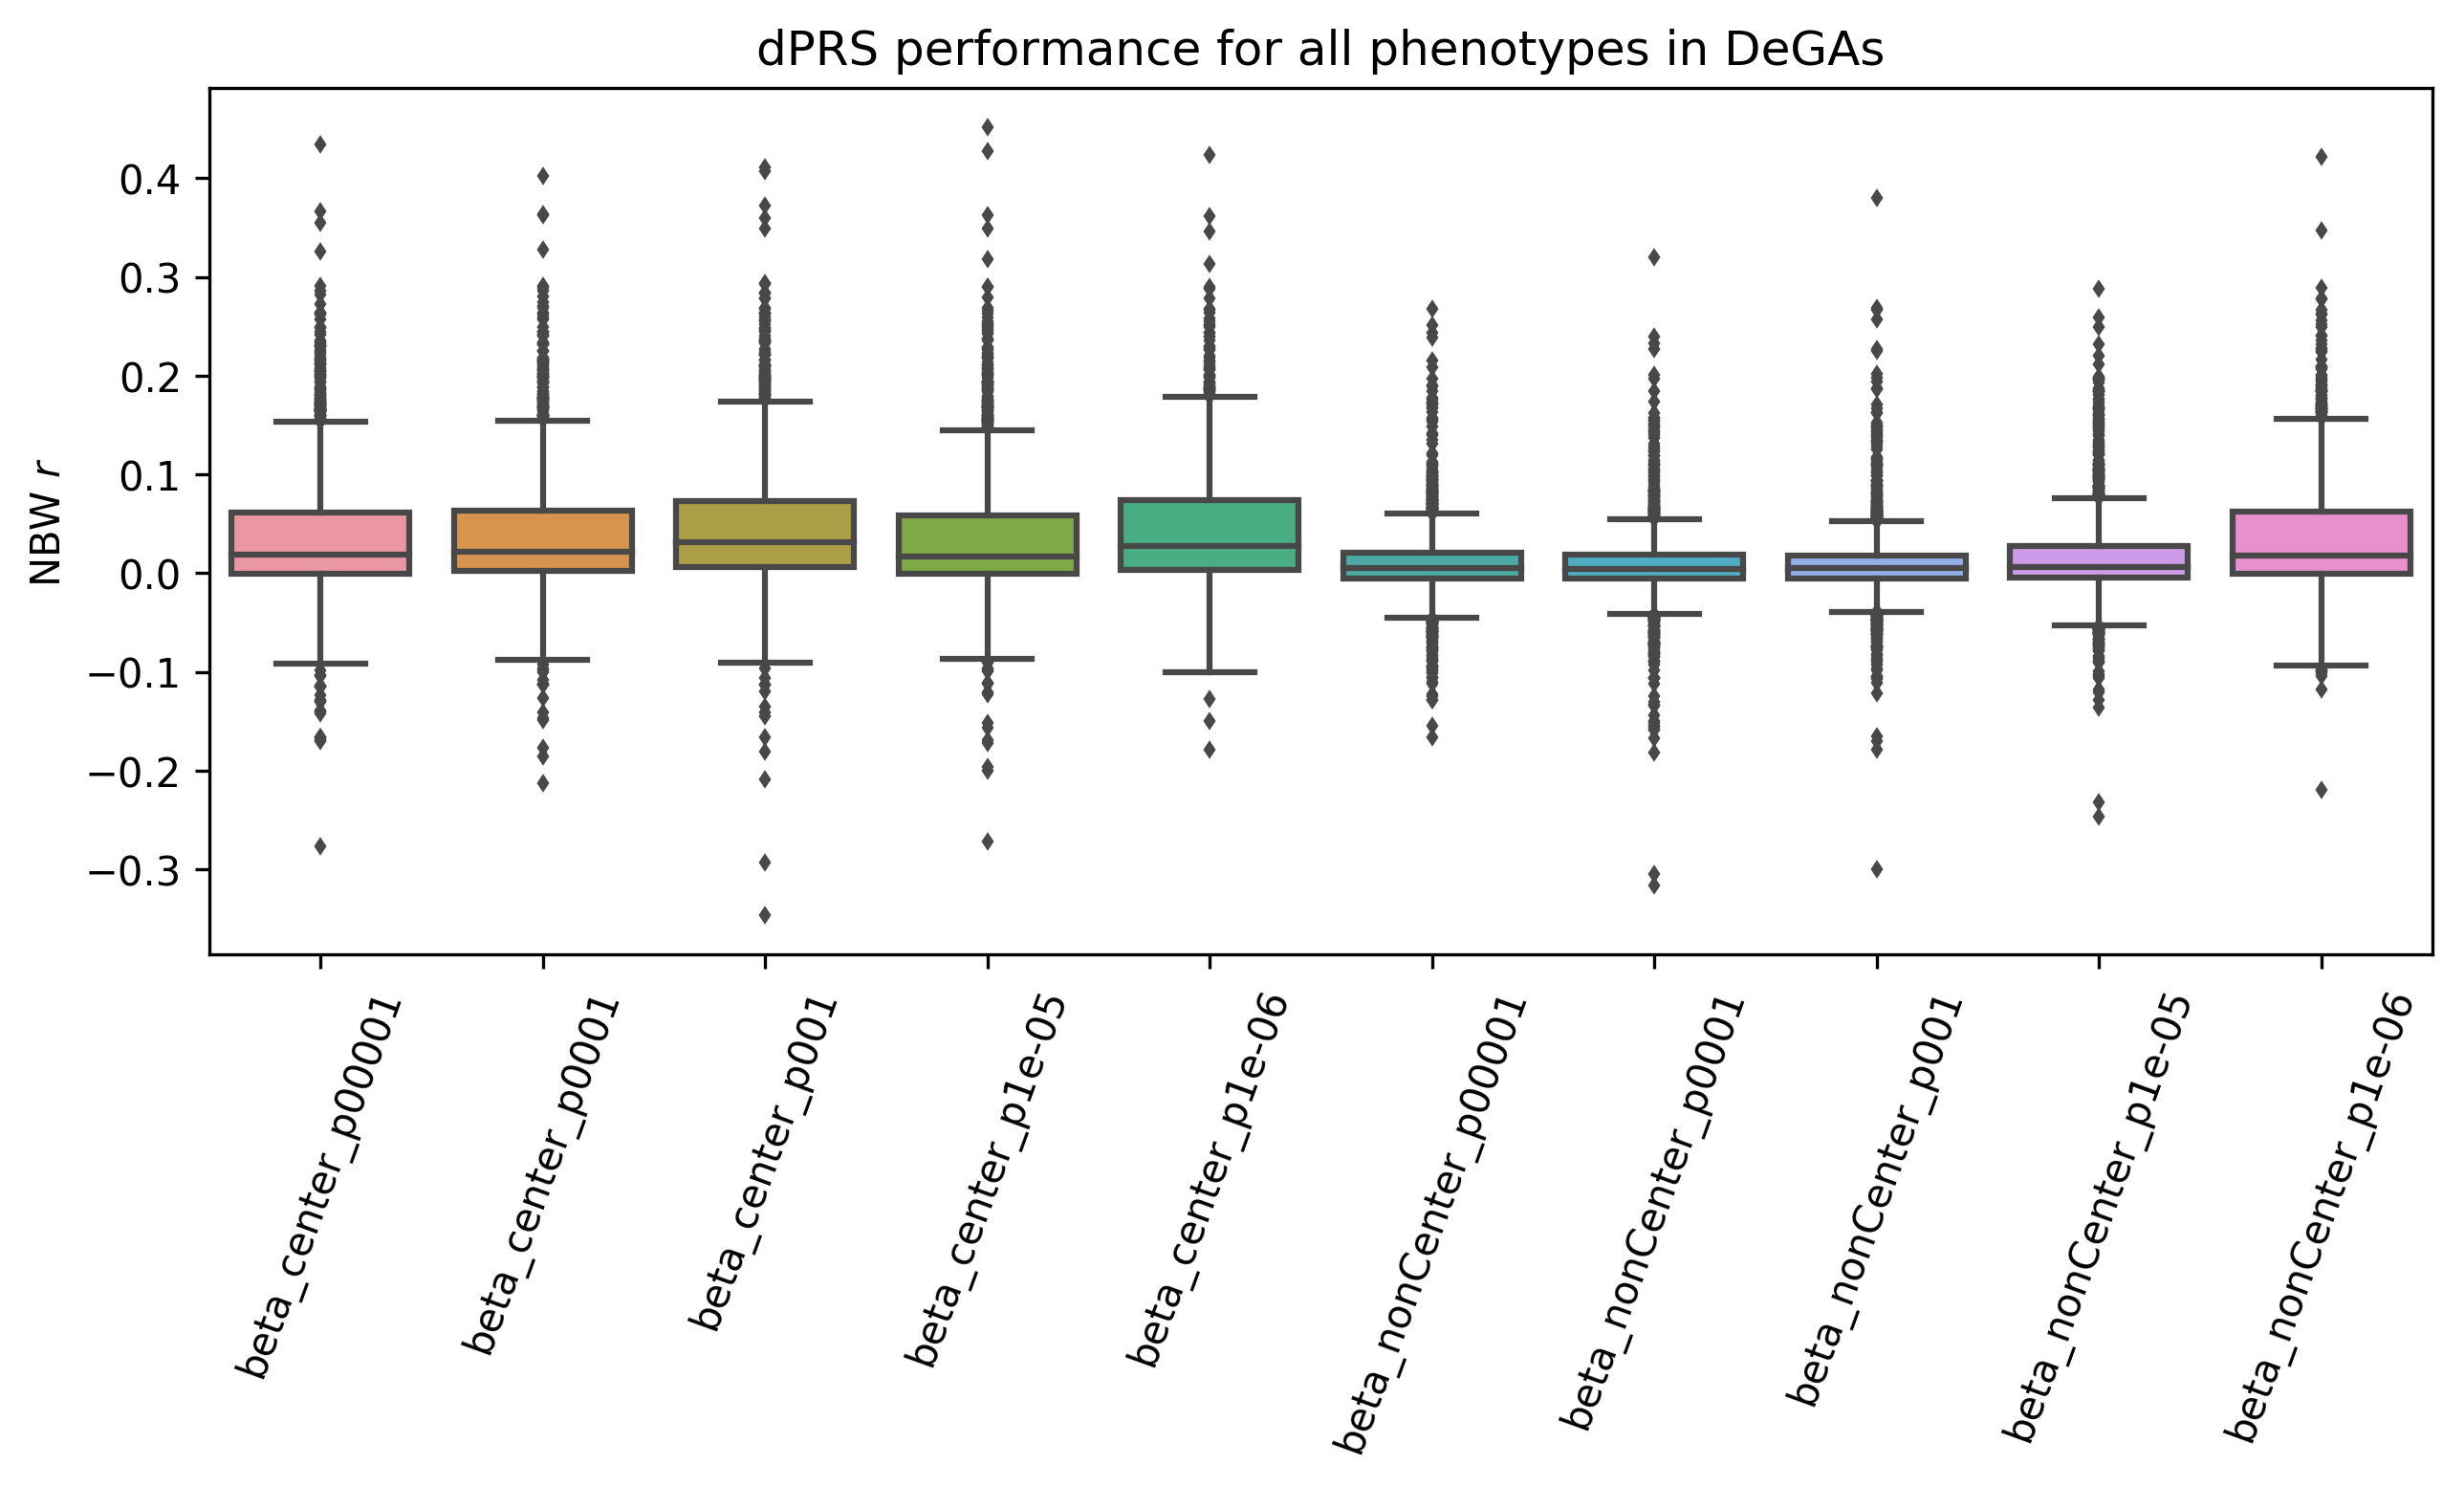

In [7]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=nbw.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(rotation=70), plt.xlabel('')
plt.ylabel('NBW '+'$r$')
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [8]:
datas['beta_center_p001'].sort_values('WBR')[::-1].head()

,WBR,NBW
PHENO,,
INI22153,0.940905,-0.346514
INI22149,0.928637,-0.013652
INI5430,0.922324,-0.009290
INI22426,0.916283,-0.015605
INI23278,0.912750,0.095642


In [9]:
datas['beta_center_p001'].sort_values('NBW')[::-1].dropna().head()

,WBR,NBW
PHENO,,
QT_FC1001717,0.370001,0.410855
INI22148,0.787282,0.406738
INI30100,0.433309,0.371873
BIN_FC2001747,0.375537,0.360033
BIN_FC1001747,0.388816,0.349177


In [10]:
pd.DataFrame([datas[d].loc['INI50',:] for d in datas], index=[d for d in datas]).sort_values('NBW')[::-1]

,WBR,NBW
beta_center_p001,0.345439,0.293056
beta_center_p0001,0.302406,0.288721
beta_center_p00001,0.272992,0.272747
beta_center_p1e-05,0.251944,0.258600
beta_center_p1e-06,0.237201,0.249141
beta_nonCenter_p1e-06,0.226266,0.240674
beta_nonCenter_p1e-05,0.068715,0.095836
beta_nonCenter_p00001,0.026712,0.056693
beta_nonCenter_p0001,0.025265,0.055743
beta_nonCenter_p001,0.025154,0.050579


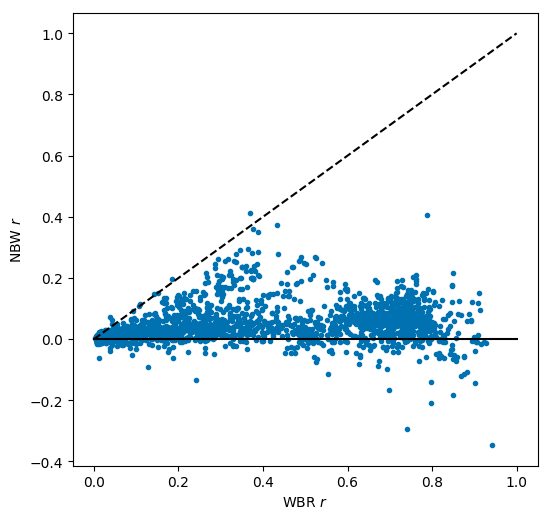

In [11]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['beta_center_p001']['WBR'], datas['beta_center_p001']['NBW'], '.')
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('WBR '+'$r$'), plt.ylabel('NBW '+'$r$')
plt.show()